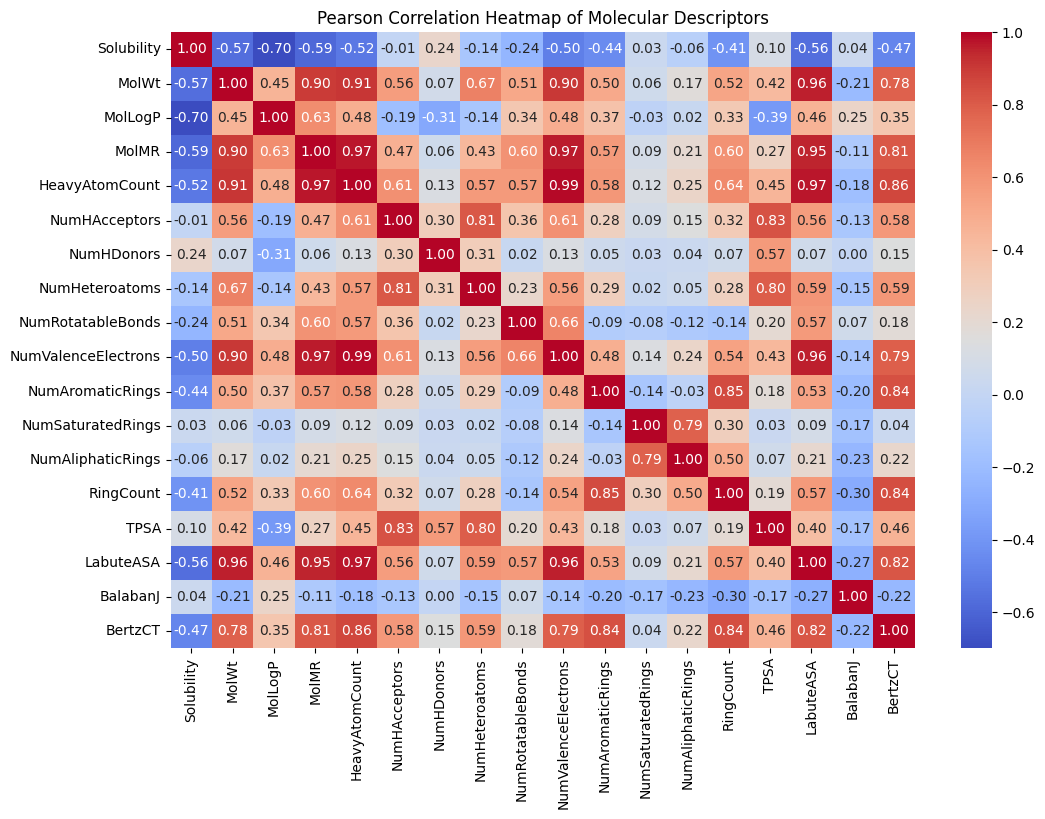

In [4]:
import pandas as pd
import rdkit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Lasso, Ridge, LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem, RDLogger
from rdkit.Chem import AllChem
from rdkit.DataStructs import TanimotoSimilarity, BulkTanimotoSimilarity

df = pd.read_csv("solubility_2000.csv")
descriptors = ['Solubility', 'MolWt', 'MolLogP', 'MolMR', 'HeavyAtomCount', 'NumHAcceptors', 'NumHDonors',
'NumHeteroatoms', 'NumRotatableBonds', 'NumValenceElectrons', 'NumAromaticRings',
'NumSaturatedRings', 'NumAliphaticRings', 'RingCount', 'TPSA', 'LabuteASA', 'BalabanJ', 'BertzCT']

# Filter the dataframe to only include these columns
df_filtered = df[descriptors]

# Compute the Pearson correlation matrix
corr_matrix = df_filtered.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation Heatmap of Molecular Descriptors')
plt.show()

In [2]:
print("""
      Numbers of H Donors has the strongest positive (0.24) correlation with Solubility.
      MolLogP, logarithm of the partition coefficient, has the strongest negative
      correlation (-0.70) with Solubility. From chemical perspective, molecules with more H donors
      can form hydrogen bonds with water molecules, increase the interaction with water molecule,  and thus increase the hydrophilicity.
      In addition, MolLogP is a significant index measuring the hydrophobicity of of a molecule.
      Hydrophobicity stands for the oil-like environment, which is non-polar solvents,
      while hydrophilic solvent, like water, is polar environment. Strong negative correlation stands for 
      high solubility in water. 
      """)


      Numbers of H Donors has the strongest positive (0.24) correlation with Solubility.
      MolLogP, logarithm of the partition coefficient, has the strongest negative
      correlation (-0.70) with Solubility. From chemical perspective, molecules with more H donors
      can form hydrogen bonds with water molecules, increase the interaction with water molecule,  and thus increase the hydrophilicity.
      In addition, MolLogP is a significant index measuring the hydrophobicity of of a molecule.
      Hydrophobicity stands for the oil-like environment, which is non-polar solvents,
      while hydrophilic solvent, like water, is polar environment. Strong negative correlation stands for 
      high solubility in water. 
      


In [3]:
# Select the specified descriptors
features = ['MolWt', 'MolLogP', 'MolMR', 'HeavyAtomCount', 'NumHAcceptors', 'NumHDonors', 
            'NumHeteroatoms', 'NumRotatableBonds', 'NumValenceElectrons', 'NumAromaticRings', 
            'NumSaturatedRings', 'NumAliphaticRings', 'RingCount', 'TPSA', 'LabuteASA', 
            'BalabanJ', 'BertzCT']
label = 'Solubility'

# Split the data into features (X) and label (y)
X = df[features]
y = df[label]

# Split the dataset into 80% training and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply standard scaling to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model using R² and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R² (Test Set): {r2:.4f}')
print(f'RMSE (Test Set): {rmse:.4f}')

R² (Test Set): 0.6440
RMSE (Test Set): 1.3484


In [6]:

#Split dataset into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#Initialize StandardScaler and LinearRegression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize lists to store RMSE and R² values for each fold
rmse_values = []
r2_values = []


X_train_np = np.array(X_train)
y_train_np = np.array(y_train)

# Step 4: Perform K-Fold cross-validation on the training set
for train_index, val_index in kf.split(X_train_np):
    # Split the training set into training and validation folds
    X_train_fold, X_val_fold = X_train_np[train_index], X_train_np[val_index]
    y_train_fold, y_val_fold = y_train_np[train_index], y_train_np[val_index]
    
    # Standardize the feature columns
    X_train_fold_scaled = scaler.fit_transform(X_train_fold)
    X_val_fold_scaled = scaler.transform(X_val_fold)
    
    # Train the model
    model.fit(X_train_fold_scaled, y_train_fold)
    
    # Make predictions on the validation fold
    y_val_pred = model.predict(X_val_fold_scaled)
    
    # Calculate RMSE and R² for the validation fold
    rmse = np.sqrt(mean_squared_error(y_val_fold, y_val_pred))
    r2 = r2_score(y_val_fold, y_val_pred)
    
    # Append the results to the lists
    rmse_values.append(rmse)
    r2_values.append(r2)
    print(rmse_values)
    print(r2_values)
    
# Calculate mean and standard deviation for RMSE and R²
mean_rmse = np.mean(rmse_values)
std_rmse = np.std(rmse_values)
mean_r2 = np.mean(r2_values)
std_r2 = np.std(r2_values)

print(f'Cross-Validation RMSE: Mean = {mean_rmse:.4f}, Std Dev = {std_rmse:.4f}')
print(f'Cross-Validation R²: Mean = {mean_r2:.4f}, Std Dev = {std_r2:.4f}')
print("""
    Cross-validation generally provides a better estimate of model performance 
    and helps ensure that your results are not overly dependent on a particular split of the data.
    However, from the result, there's no significant difference between simple training and 
    cross-validation. Within 2000 samples, it can be explained that the sample trained in question 
    B is 80 percent of the data set, while in cross-validation, we split the 80 percent of data,
    train 4/5 of it and validate 1/5 of it. Within 64 percent of training data, the model might go through
    underfitting and larger error. Nevertheless, this approach is still availiable when it comes to larger 
    data set from theoretical perspective.
    """)

[1.4014655101434625]
[0.5641172505206031]
[1.4014655101434625, 1.231648499207437]
[0.5641172505206031, 0.6830597759496699]
[1.4014655101434625, 1.231648499207437, 1.415148005402302]
[0.5641172505206031, 0.6830597759496699, 0.6086396081156573]
[1.4014655101434625, 1.231648499207437, 1.415148005402302, 1.4505916941767671]
[0.5641172505206031, 0.6830597759496699, 0.6086396081156573, 0.6136535117994357]
[1.4014655101434625, 1.231648499207437, 1.415148005402302, 1.4505916941767671, 1.4112690218541841]
[0.5641172505206031, 0.6830597759496699, 0.6086396081156573, 0.6136535117994357, 0.6345726994684855]
Cross-Validation RMSE: Mean = 1.3820, Std Dev = 0.0770
Cross-Validation R²: Mean = 0.6208, Std Dev = 0.0387

    Cross-validation generally provides a better estimate of model performance 
    and helps ensure that your results are not overly dependent on a particular split of the data.
    However, from the result, there's no significant difference between simple training and 
    cross-valida

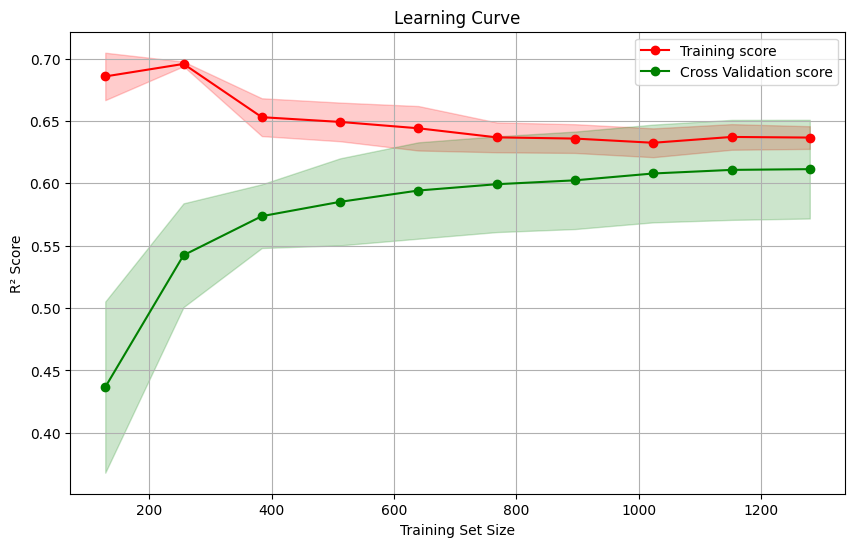


    Overfitting:
    The training score will be very high (close to 1), and the validation score will be low and remain far from the training score as the training size increases.
    This means the model is fitting the training data too well but cannot generalize to unseen data (validation set).
    
    Underfitting:
    Both the training and validation scores will be low and close to each other, meaning the model isn't even fitting the training data well.
    This suggests that the model is too simple or lacks the capacity to capture the complexity of the data.
      
    Good Fit:
    Both the training and validation scores should increase as the training size grows and converge to a high score (close to 1) without a large gap between them.
      
    Based on the definition above, I think my model is good fitting, since the score converges when the training set size goes up.
      


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Apply standard scaling to the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the model
model = LinearRegression()

# Compute the learning curve
train_sizes, train_scores, valid_scores = learning_curve(
    estimator=model,X=X_train_scaled,y=y_train,cv=5,scoring='r2',train_sizes=np.linspace(0.1, 1.0, 10),random_state=42)

# Calculate mean and standard deviation for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='red', label='Training score')
plt.plot(train_sizes, valid_scores_mean, 'o-', color='green', label='Cross Validation score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='red', alpha=0.2)
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, color='green', alpha=0.2)
plt.xlabel('Training Set Size')
plt.ylabel('R² Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

print("""
    Overfitting:
    The training score will be very high (close to 1), and the validation score will be low and remain far from the training score as the training size increases.
    This means the model is fitting the training data too well but cannot generalize to unseen data (validation set).
    
    Underfitting:
    Both the training and validation scores will be low and close to each other, meaning the model isn't even fitting the training data well.
    This suggests that the model is too simple or lacks the capacity to capture the complexity of the data.
      
    Good Fit:
    Both the training and validation scores should increase as the training size grows and converge to a high score (close to 1) without a large gap between them.
      
    Based on the definition above, I think my model is good fitting, since the score converges when the training set size goes up.
      """)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.634e+00, tolerance: 6.590e-01
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.402e+01, tolerance: 6.484e-01
  model = cd_fast.enet_coordinate_descent(


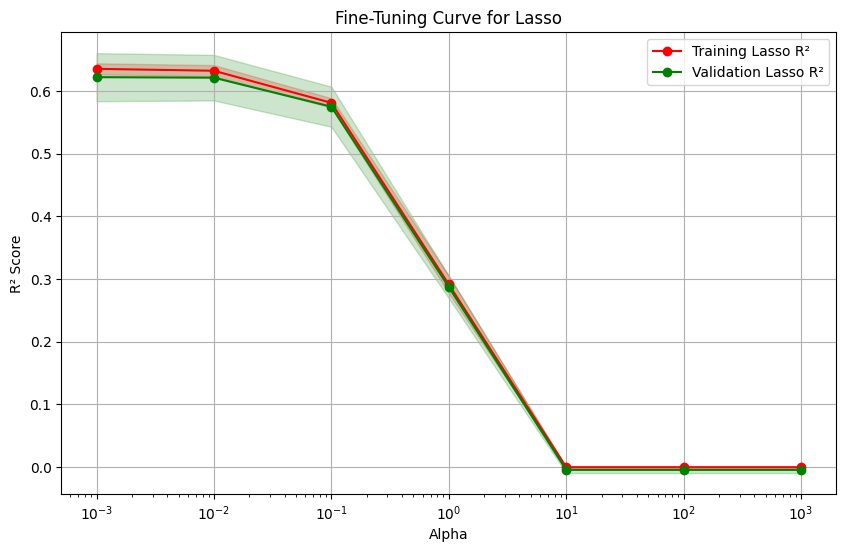

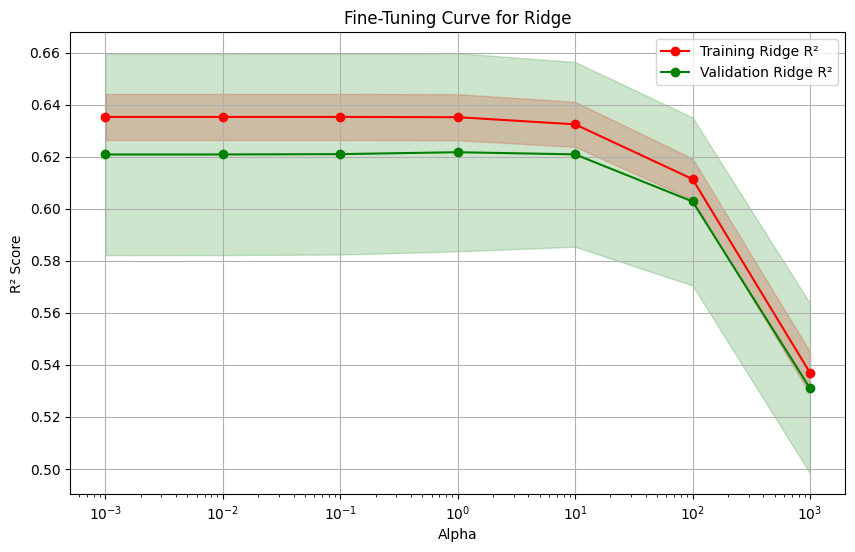

Best Lasso Model - Alpha: 0.001
Test RMSE: 1.3477, Test R²: 0.6443
Best Ridge Model - Alpha: 1
Test RMSE: 1.3472, Test R²: 0.6446
Linear Regression Test RMSE: 1.3484, Test R²: 0.6440


In [12]:

# Split the dataset (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert y_train to a NumPy array to avoid indexing issues
y_train = np.array(y_train)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the alpha values to test
alphas = [10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3]

# Reusable function for model training and cross-validation
def fine_tune_model(model_class, alphas, X_train, y_train, model_name):
    mean_r2_train = []
    std_r2_train = []
    mean_r2_val = []
    std_r2_val = []
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    for alpha in alphas:
        model = model_class(alpha=alpha)
        train_r2_scores = []
        val_r2_scores = []
        
        for train_index, val_index in kf.split(X_train):
            # Split training data into training and validation folds
            X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
            y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]  # y_train is now a NumPy array
            
            # Train the model
            model.fit(X_train_fold, y_train_fold)
            
            # Evaluate on training fold
            train_r2 = model.score(X_train_fold, y_train_fold)
            train_r2_scores.append(train_r2)
            
            # Evaluate on validation fold
            val_r2 = model.score(X_val_fold, y_val_fold)
            val_r2_scores.append(val_r2)
        
        # Record mean and standard deviation of R² scores
        mean_r2_train.append(np.mean(train_r2_scores))
        std_r2_train.append(np.std(train_r2_scores))
        mean_r2_val.append(np.mean(val_r2_scores))
        std_r2_val.append(np.std(val_r2_scores))
    
    # Plot the fine-tuning curves
    plt.figure(figsize=(10, 6))
    plt.plot(alphas, mean_r2_train, 'o-', color="red", label=f"Training {model_name} R²")
    plt.plot(alphas, mean_r2_val, 'o-', color="green", label=f"Validation {model_name} R²")
    plt.fill_between(alphas, np.array(mean_r2_train) - np.array(std_r2_train),
                     np.array(mean_r2_train) + np.array(std_r2_train), color="red", alpha=0.2)
    plt.fill_between(alphas, np.array(mean_r2_val) - np.array(std_r2_val),
                     np.array(mean_r2_val) + np.array(std_r2_val), color="green", alpha=0.2)
    
    plt.xscale('log')
    plt.xlabel('Alpha')
    plt.ylabel('R² Score')
    plt.title(f'Fine-Tuning Curve for {model_name}')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    
    return mean_r2_val, std_r2_val

# Train and fine-tune Lasso model
lasso_r2, lasso_std = fine_tune_model(Lasso, alphas, X_train_scaled, y_train, 'Lasso')

# Train and fine-tune Ridge model
ridge_r2, ridge_std = fine_tune_model(Ridge, alphas, X_train_scaled, y_train, 'Ridge')

# Test on the held-out test set using the best alpha for both models
best_alpha_lasso = alphas[np.argmax(lasso_r2)]
best_alpha_ridge = alphas[np.argmax(ridge_r2)]

# Train final Lasso and Ridge models with the best alpha
best_lasso_model = Lasso(alpha=best_alpha_lasso).fit(X_train_scaled, y_train)
best_ridge_model = Ridge(alpha=best_alpha_ridge).fit(X_train_scaled, y_train)

# Make predictions on the test set
lasso_test_pred = best_lasso_model.predict(X_test_scaled)
ridge_test_pred = best_ridge_model.predict(X_test_scaled)

# Compute RMSE and R² for Lasso on test set
lasso_test_rmse = np.sqrt(mean_squared_error(y_test, lasso_test_pred))
lasso_test_r2 = r2_score(y_test, lasso_test_pred)

# Compute RMSE and R² for Ridge on test set
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, ridge_test_pred))
ridge_test_r2 = r2_score(y_test, ridge_test_pred)

print(f'Best Lasso Model - Alpha: {best_alpha_lasso}')
print(f'Test RMSE: {lasso_test_rmse:.4f}, Test R²: {lasso_test_r2:.4f}')
print(f'Best Ridge Model - Alpha: {best_alpha_ridge}')
print(f'Test RMSE: {ridge_test_rmse:.4f}, Test R²: {ridge_test_r2:.4f}')

# Compare with non-regularized Linear Regression
linreg_model = LinearRegression().fit(X_train_scaled, y_train)
linreg_test_pred = linreg_model.predict(X_test_scaled)
linreg_test_rmse = np.sqrt(mean_squared_error(y_test, linreg_test_pred))
linreg_test_r2 = r2_score(y_test, linreg_test_pred)

print(f'Linear Regression Test RMSE: {linreg_test_rmse:.4f}, Test R²: {linreg_test_r2:.4f}')


In [9]:
# Apply standard scaling to the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the best alpha values from part (e)
best_alpha_lasso = 0.001
best_alpha_ridge = 1 

# Train the best Lasso model
lasso = Lasso(alpha=best_alpha_lasso)
lasso.fit(X_scaled, y)

# Train the best Ridge model
ridge = Ridge(alpha=best_alpha_ridge)
ridge.fit(X_scaled, y)

# Extract the coefficients
lasso_coefficients = lasso.coef_
ridge_coefficients = ridge.coef_

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({
    'Feature': features,
    'Lasso Coefficient': lasso_coefficients,
    'Ridge Coefficient': ridge_coefficients
})

# Identify the most important feature based on the absolute value of coefficients
most_important_lasso = coef_df.loc[np.argmax(np.abs(lasso_coefficients)), 'Feature']
most_important_ridge = coef_df.loc[np.argmax(np.abs(ridge_coefficients)), 'Feature']

print(f'Most important feature according to Lasso: {most_important_lasso}')
print(f'Most important feature according to Ridge: {most_important_ridge}')

# Display the coefficients DataFrame
print(coef_df)

Most important feature according to Lasso: LabuteASA
Most important feature according to Ridge: LabuteASA
                Feature  Lasso Coefficient  Ridge Coefficient
0                 MolWt          -0.324459          -0.370015
1               MolLogP          -1.680178          -1.675199
2                 MolMR           1.045236           1.052055
3        HeavyAtomCount          -0.000000          -0.404362
4         NumHAcceptors           0.267887           0.270933
5            NumHDonors           0.208474           0.207631
6        NumHeteroatoms           0.041245           0.038091
7     NumRotatableBonds           0.000000          -0.001869
8   NumValenceElectrons           0.871007           1.156824
9      NumAromaticRings          -0.000000          -0.103168
10    NumSaturatedRings           0.076325           0.081017
11    NumAliphaticRings          -0.006761          -0.077429
12            RingCount          -0.266489          -0.130139
13                 TPSA   

In [141]:
def TanimotoSimilarity(fpA, fpB):
    """Calculate Tanimoto similarity between two bit vectors."""
    return DataStructs.TanimotoSimilarity(fpA, fpB)

Tanimoto similarity between first two molecules: 0.0667
Bulk Tanimoto similarity verification: 0.0667
Most similar pair: Molecule 0 and Molecule 0
Least similar pair: Molecule 0 and Molecule 71


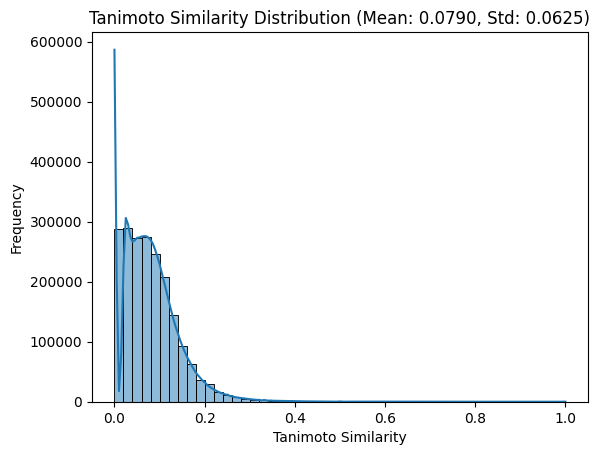

Average Tanimoto similarity: 0.0790
Standard deviation of Tanimoto similarities: 0.0625


In [142]:
# Extract SMILES from the DataFrame
smiles_list = df['SMILES'].dropna().tolist()

RDLogger.DisableLog("rdApp.*")

# Function to remove hydrogens and handle molecule validity
def process_molecule(smi):
    mol = Chem.MolFromSmiles(smi)
    if mol is not None:
        # Remove hydrogens
        mol = Chem.RemoveHs(mol)
        return mol
    else:
        print(f"Invalid SMILES string: {smi}")
    return None

# Convert SMILES to RDKit mol objects
mol_list = [process_molecule(smi) for smi in smiles_list]
mol_list = [mol for mol in mol_list if mol is not None]

# Generate Morgan fingerprints for each molecule (radius=2, nBits=2048)
fps = [AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048) for mol in mol_list]

# Function to calculate Tanimoto Similarity
def TanimotoSimilarity(fp1, fp2):
    return DataStructs.FingerprintSimilarity(fp1, fp2)

# Calculate Tanimoto similarity between the first two molecules in the dataset
tanimoto_sim = TanimotoSimilarity(fps[0], fps[1])
print(f"Tanimoto similarity between first two molecules: {tanimoto_sim:.4f}")

# Verify with BulkTanimotoSimilarity
bulk_tanimoto_sim = DataStructs.BulkTanimotoSimilarity(fps[0], fps)
print(f"Bulk Tanimoto similarity verification: {bulk_tanimoto_sim[1]:.4f}")

# Calculate all pairwise Tanimoto similarities using RDKit's BulkTanimotoSimilarity
similarity_matrix = np.zeros((len(fps), len(fps)))
for i in range(len(fps)):
    similarity_matrix[i, :] = DataStructs.BulkTanimotoSimilarity(fps[i], fps)

# Find the most and least similar pairs
most_similar_pair = np.unravel_index(np.argmax(similarity_matrix, axis=None), similarity_matrix.shape)
least_similar_pair = np.unravel_index(np.argmin(similarity_matrix, axis=None), similarity_matrix.shape)

print(f"Most similar pair: Molecule {most_similar_pair[0]} and Molecule {most_similar_pair[1]}")
print(f"Least similar pair: Molecule {least_similar_pair[0]} and Molecule {least_similar_pair[1]}")

# Plot the distribution of Tanimoto similarities
similarities = similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)]
mean_similarity = np.mean(similarities)
std_similarity = np.std(similarities)

sns.histplot(similarities, bins=50, kde=True)
plt.title(f'Tanimoto Similarity Distribution (Mean: {mean_similarity:.4f}, Std: {std_similarity:.4f})')
plt.xlabel('Tanimoto Similarity')
plt.ylabel('Frequency')
plt.show()

# Report the average and standard deviation
print(f"Average Tanimoto similarity: {mean_similarity:.4f}")
print(f"Standard deviation of Tanimoto similarities: {std_similarity:.4f}")
